# Sirius Top 100 Model

Experiment to see how the different parameters mimic the recent Top 100 Springsteen Songs contest on Sirius. Apparently 31,000 listeners selected their top 10 songs from a list of 300. This is an attempt to see if this can be modeled.

## Assumptions

* There is a true top 100 list. We are going to see if voting can re-create the list.
* The list will be represented by a weighting of 1.300 to 1.001 to represent the order. 1.300 is the number 1 song. The hypothesis is that the subtle weighting in the rank values will carry through to the end list even though a uniform distribution is used to generate random "votes."

## Parameters

### Number of votes per voter
* Votes are ranked
* Votes are equal
### Number of voters

In [1]:
%matplotlib inline
import random as random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [2]:
MAX_SONG = 300
MAX_VOTERS = 100000
NUM_VOTES = 10

In [3]:
random.sample(range(1001,1300),10)

[1145, 1291, 1276, 1043, 1152, 1031, 1039, 1058, 1255, 1115]

Can I use the ZIP function to multiply the sample by a weight? -- not likely

https://stackoverflow.com/questions/10271484/how-to-perform-element-wise-multiplication-of-two-lists-in-python

In [1]: import numpy as np

In [2]: a = np.array([1,2,3,4])

In [3]: b = np.array([2,3,4,5])

In [4]: a * b
Out[4]: array([ 2,  6, 12, 20])

In [4]:
list(range(NUM_VOTES,0,-1))

[10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

In [5]:
songs = np.array(random.sample(range(1001,1300),10))
rank = np.array(list(range(NUM_VOTES,0,-1)))
songs * rank

array([11960,  9954,  9392,  8022,  7272,  5390,  4912,  3078,  2054,  1077])

Should I multiply the song by the score (so the weight applies) or just add the votes?

Both options should be tried. 

In [6]:
bsongs = np.zeros(MAX_SONG, dtype=int)

In [7]:
bsongs

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [8]:
bsongs = np.zeros(MAX_SONG, dtype=int)
indx = 10;
for sng in random.sample(range(1,31),10):
    bsongs[sng] = indx;
    indx -= 1;

In [9]:
bsongs

array([ 0,  3,  0,  0,  8,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  6,  0,  9,  2,  5,  0,  0,  0,  0,  7, 10,  4,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [10]:
bsongs = np.zeros(MAX_SONG, dtype=int)
tophun = np.zeros(MAX_SONG, dtype=int)
for voter in range(1,101):
    indx = 10;
    for sng in random.sample(range(1,31),10):
        bsongs[sng] += indx;
        indx -= 1;
print(bsongs);
for weight in range(0,31):
    wt = (100 + weight)/100;
    print(wt);
    tophun[weight] = wt * bsongs[weight];
print(tophun);

[  0 213 171 177 218 190 146 182 258 155 145 173 226 131 148 156 240 226
 176 172 157 121 163 219 193 168 178 214 154 182 248   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

[     0 548779 550779 550448 551075 548331 549314 548431 548049 553104
 550336 550088 549471 552972 553038 550571 551411 553052 550192 551292
 550449 550658 547409 548927 548280 546450 551418 548353 549394 551088
 546841      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      0      0      0      0      0      0      0      0      0      0
      

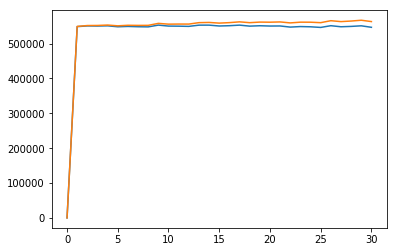

In [11]:
bsongs = np.zeros(MAX_SONG, dtype=int)
tophun = np.zeros(MAX_SONG, dtype=int)
for voter in range(1,300001):
    indx = 10;
    for sng in random.sample(range(1,31),10):
        bsongs[sng] += indx;
        indx -= 1;
print(bsongs);
for weight in range(0,31):
    wt = (1000 + weight)/1000;
    #print(wt);
    tophun[weight] = wt * bsongs[weight];
print(tophun);
plt.plot(bsongs[:31])
plt.plot(tophun[:31])

## More insights

The list of choices are ranked by the voter. When they can see the song list, they pick and rank their 10 choices. 

In our proxy effort, the higher numbered songs have higher weights. We should sort the sample so the numbers are ordered and then assign our votes. Sort ranks smallest to highest, so reverse the sort when assigning weights.

In [12]:
bsongs = np.zeros(MAX_SONG, dtype=int)
tophun = np.zeros(MAX_SONG, dtype=int)
for voter in range(1,101):
    indx = 10;
    picks = random.sample(range(1,31),10);
    picks.sort();
    for sng in reversed(picks):
        bsongs[sng] += indx;
        indx -= 1;
print(bsongs);
for weight in range(0,31):
    wt = (100 + weight)/100;
    #print(wt);
    tophun[weight] = wt * bsongs[weight];
print(tophun);

[  0  29  50  45  66  75  82  93  98  97 124 109 143 132 177 203 184 183
 242 258 265 263 260 255 243 283 280 294 278 299 390   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

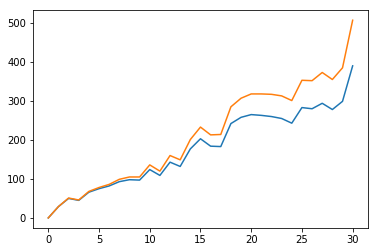

In [13]:
plt.plot(bsongs[:31])
plt.plot(tophun[:31])

## Graphing

Add a way to see the votes graphically.

Following Chapter 5 of 2nd Edition, Python for Data Analysis

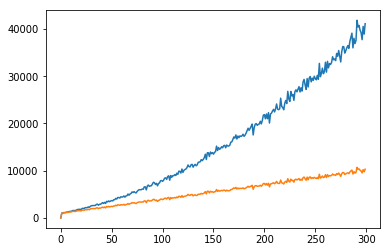

In [14]:
MAX_SONG = 300
MAX_VOTERS = 30000
bsongs = np.zeros(MAX_SONG, dtype=int)
tophun = np.zeros(MAX_SONG, dtype=int)
for voter in range(1,MAX_VOTERS):
    indx = 10
    picks = random.sample(range(1,MAX_SONG),10)
    picks.sort()
    for sng in reversed(picks):
        bsongs[sng] += indx
        indx -= 1
#print(bsongs[0:MAX_SONG])
for weight in range(0,MAX_SONG):
    wt = (100 + weight)/100
    #print(wt)
    tophun[weight] = wt * bsongs[weight]
plt.plot(tophun)
plt.plot(bsongs)

## What about 1 vote for best song?

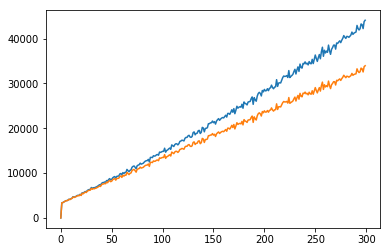

In [15]:
MAX_SONG = 300
MAX_VOTERS = 100000
NUM_VOTES = 10
bsongs = np.zeros(MAX_SONG, dtype=int)
tophun = np.zeros(MAX_SONG, dtype=int)
for voter in range(1,MAX_VOTERS):
    indx = NUM_VOTES
    picks = random.sample(range(1,MAX_SONG),NUM_VOTES)
    picks.sort()
    for sng in reversed(picks):
        bsongs[sng] += indx
        indx -= 1
#print(bsongs[0:MAX_SONG])
for weight in range(0,MAX_SONG):
    wt = (1000 + weight)/1000
    #print(wt)
    tophun[weight] = wt * bsongs[weight]
plt.plot(tophun)
plt.plot(bsongs)